In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%ls

apicache/                        flatten-occupation.py           out.txt
data_label.py                    flatten.py                      pywiki-test.py
Field_of_work_Analysis.ipynb     fow_id2label.json               Sandbox.ipynb
field_of_work-index.csv          occ_id2label.json               throttle.ctrl
flatten_field_of_work-index.csv  Occupation_Data_Analysis.ipynb  Untitled.ipynb
flatten_occupation-index.csv     occupation-index.csv


In [51]:
fow = pd.read_csv('flatten_field_of_work-index.csv')
fow.head(2)

,qid,transgender male,female,male
0,Q4175034,0,0,1
1,Q210189,0,0,1


In [8]:
import json
with open('fow_id2label.json', 'r') as f:
    labels = json.load(f)
labels['Q2053']

{u'subclass': [u'Uncategorized'], u'title': u'HTML5'}

In [57]:
subclass_df = pd.DataFrame(labels).T.reset_index()
subclass_df.columns = ['qid', 'subclass', 'title']
subclass_df.head(5)

,qid,subclass,title
0,Q1004,[work],comic
1,Q101017,[Uncategorized],distillation
2,Q101333,[Uncategorized],mechanical engineering
3,Q101929,[biology],immunology
4,Q1020604,[Uncategorized],Stage combat


In [69]:
fow = pd.merge(subclass_df, fow, on='qid')

In [73]:
fow[fow['transgender male'] > 0]

,qid,subclass,title,transgender male,female,male
475,Q17884,[Uncategorized],LGBT,1,0,1


In [75]:
fow.describe()

,transgender male,female,male
count,1625.000000,1625.000000,1625.000000
mean,0.000615,0.576000,4.737846
std,0.024807,2.501091,30.216831
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.000000
max,1.000000,48.000000,591.000000


In [78]:
fow.sort("male", ascending=False)[:10]

,qid,subclass,title,transgender male,female,male
576,Q191163,[figurative art],landscape art,0,29,591
1498,Q82955,[human],politician,0,21,509
969,Q36180,[author],writer,0,48,505
1021,Q39631,[health care provider],physician,0,19,399
179,Q12479,[area of mathematics],number theory,0,10,317
414,Q170571,[artistic theme],still life,0,41,285
1438,Q7754,[area of mathematics],mathematical analysis,0,8,248
1077,Q42989,[area of mathematics],topology,0,13,197
1431,Q76592,[area of mathematics],combinatorics,0,8,151
1249,Q5862903,[mathematics],probability theory,0,2,150


In [79]:
fow.sort("female", ascending=False)[:10]

,qid,subclass,title,transgender male,female,male
969,Q36180,[author],writer,0,48,505
432,Q17279581,[still life],floral painting,0,44,83
414,Q170571,[artistic theme],still life,0,41,285
576,Q191163,[figurative art],landscape art,0,29,591
1498,Q82955,[human],politician,0,21,509
1021,Q39631,[health care provider],physician,0,19,399
779,Q2405480,[actor],voice actor,0,19,9
606,Q194294,[ethics],bioethics,0,17,79
989,Q37260,[communication],writing,0,15,148
1320,Q6495391,[Uncategorized],late modern period,0,14,75


In [90]:
fow['total'] = fow['male'] + fow['female']

In [99]:
fow.sort('total', ascending=False)[:10]

,qid,subclass,title,transgender male,female,male,total,ratio(m/f)
576,Q191163,[figurative art],landscape art,0,29,591,620,20.379310
969,Q36180,[author],writer,0,48,505,553,10.520833
1498,Q82955,[human],politician,0,21,509,530,24.238095
1021,Q39631,[health care provider],physician,0,19,399,418,21.000000
179,Q12479,[area of mathematics],number theory,0,10,317,327,31.700000
414,Q170571,[artistic theme],still life,0,41,285,326,6.951220
1438,Q7754,[area of mathematics],mathematical analysis,0,8,248,256,31.000000
1077,Q42989,[area of mathematics],topology,0,13,197,210,15.153846
989,Q37260,[communication],writing,0,15,148,163,9.866667
1431,Q76592,[area of mathematics],combinatorics,0,8,151,159,18.875000


In [94]:
fow['ratio(m/f)'] = fow['male'] / fow ['female']

In [109]:
fow.sort('ratio(m/f)', ascending=False)[1170:1200]

,qid,subclass,title,transgender male,female,male,total,ratio(m/f)
492,Q180592,[philosophy],social philosophy,0,0,1,1,inf
645,Q2045692,[Uncategorized],Industrial and organizational psychology,0,0,1,1,inf
1249,Q5862903,[mathematics],probability theory,0,2,150,152,75.000000
1466,Q8087,[area of mathematics],geometry,0,2,138,140,69.000000
180,Q12482,[Uncategorized],set theory,0,1,66,67,66.000000
136,Q1166618,[Uncategorized],mathematical logic,0,1,57,58,57.000000
570,Q190549,[area of mathematics],functional analysis,0,1,50,51,50.000000
831,Q2737409,[Uncategorized],Hadith studies,0,1,40,41,40.000000
1527,Q844924,[black market],illegal drug trade,0,3,102,105,34.000000
179,Q12479,[area of mathematics],number theory,0,10,317,327,31.700000


In [126]:
fow['ratio(f/m)'] = 1/fow['ratio(m/f)']
fow.sort('ratio(f/m)', ascending=False)[240:300]

,qid,subclass,title,transgender male,female,male,total,ratio(m/f),ratio(f/m)
88,Q112983,[biography],memoir,0,1,0,1,0.000000,inf
87,Q11285118,[Uncategorized],History of the Southern United States,0,1,0,1,0.000000,inf
894,Q3151629,[Uncategorized],NaN,0,1,0,1,0.000000,inf
1267,Q596284,[Uncategorized],metaphilosophy,0,1,0,1,0.000000,inf
1233,Q5569949,[Uncategorized],Glitch art,0,1,0,1,0.000000,inf
892,Q3136561,[Uncategorized],NaN,0,1,0,1,0.000000,inf
533,Q1857766,[Uncategorized],current affairs,0,1,0,1,0.000000,inf
94,Q11358,[organic compound],carbohydrate,0,1,0,1,0.000000,inf
1243,Q576342,[organization],salon,0,2,0,2,0.000000,inf
1178,Q50030,[art of painting],watercolor,0,4,1,5,0.250000,4.000000


In [122]:
#fow.sort(['male', 'female'], ascending=False)

In [127]:
fow.sort('female', ascending=False)[:10]

,qid,subclass,title,transgender male,female,male,total,ratio(m/f),ratio(f/m)
969,Q36180,[author],writer,0,48,505,553,10.520833,0.095050
432,Q17279581,[still life],floral painting,0,44,83,127,1.886364,0.530120
414,Q170571,[artistic theme],still life,0,41,285,326,6.951220,0.143860
576,Q191163,[figurative art],landscape art,0,29,591,620,20.379310,0.049069
1498,Q82955,[human],politician,0,21,509,530,24.238095,0.041257
1021,Q39631,[health care provider],physician,0,19,399,418,21.000000,0.047619
779,Q2405480,[actor],voice actor,0,19,9,28,0.473684,2.111111
606,Q194294,[ethics],bioethics,0,17,79,96,4.647059,0.215190
989,Q37260,[communication],writing,0,15,148,163,9.866667,0.101351
1320,Q6495391,[Uncategorized],late modern period,0,14,75,89,5.357143,0.186667


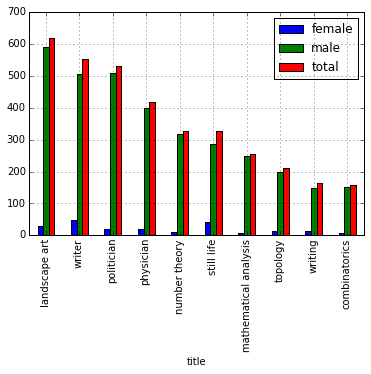

In [169]:
_sfow = fow.sort('total', ascending=False)
_sfow = _sfow.set_index('title')
_sfow.iloc[:10, 3:6].plot(kind='bar')

In [142]:
plt.show()

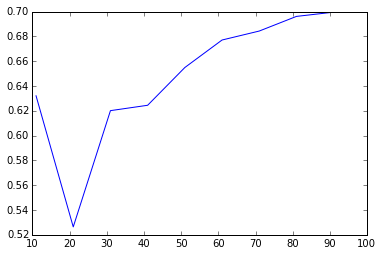

In [179]:
# Pearsons' correlation coefficient between number of male and female people
# working in top ten fields (given by total number of people in that field)
np.corrcoef(_sfow['male'][:20], _sfow['female'][:20])[0,1]

# The answer however increases when taking more and more fields into account
# but I think it's mostly because for a large number of fields, the number
# of people working in them is very few (0-5) for both gender. This causes
# an increase in correlation.

plt.plot(list(range(1, 100, 10)),
         [np.corrcoef(_sfow['male'][:x], _sfow['female'][:x])[0,1] for x in range(1, 100, 10)])